# Fourier Series

<h1>People for This Lecture</h1>

<table>
<tr>
<th><div align="center">Archimedes</div></th>
<th><div align="center">Newton</div></th>
<th><div align="center">Fourier</div></th>

</tr>
<tr>
    <td><img src="data/images/archimedes.png" width="30%"> </td>
    <td><img src="data/images/newton.png" width="40%"></td>
    <td><img src="data/images/Fourier.jpg" width="40%"></td>

</tr>
</table>

<h2>References</h2>
1. Willi Richert and Luis Pedro Coelho, Building Machine Learning Systems with Python, Packt publishing,2013.
2. WikiMedia



## Basics:

- Effective Data Manipulation: NumPy
- Power Scientific computing Subroutines: SciPy
- Data Visualization: Matplotlib

## Recommended Integrated Python Environment
- Our Live Linux System
- AnaConda

## Outline

- [Basics of Python](#Basics of Python)
- [Python Visualization](#Python Visualization)
- [Mathematical Basics for Signal Analysis](#Mathematical Basics)
  - [outline](#Outline)
  

<h2 id="Basics of Python">Basics of Python</h2>

## Uses of Python Library

- import numpy
        The library, numpy, Claimed to add to system and wait to be called to work
- from numpy import *
        all the properties, function, and sub-modules are loaded and ready to work (NOT RECOMMENDED)
- import numpy as np
        like the first case, but called by np but not by numpy 
   

In [1]:
%matplotlib inline
import numpy as np
from numpy import pi,sin,cos,linspace,sin,pi,int16
import scipy
import scipy.fftpack
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from scipy.io.wavfile import read,write

from matplotlib.pylab import plot,show,axis
import os

## How to define a math function
Theoretically, define the function on the given domain. But in computing applications, it is better to given an "array" of data in domain with their function values since a bounded interval contains infinite points!

- math expresion

      t0       t1       t2      ...  tn
      sin(t0)  sin(t1)  sin(t2) ...  sin(tn)

- Python expression
      t=numpy.linspace(t0,tn, n+1)
      sin(t)

In [2]:
# Define a sine function over [0,2*pi]
array1=np.linspace(0,2*pi,401)

In [3]:
array1[0:10]

array([ 0.        ,  0.01570796,  0.03141593,  0.04712389,  0.06283185,
        0.07853982,  0.09424778,  0.10995574,  0.12566371,  0.14137167])

In [4]:
SinData=sin(array1)
print(SinData[-10:])

[ -1.40901232e-01  -1.25333234e-01  -1.09734311e-01  -9.41083133e-02
  -7.84590957e-02  -6.27905195e-02  -4.71064507e-02  -3.14107591e-02
  -1.57073173e-02  -2.44929360e-16]


<h2 "Python Visualization">Python Visualization</h2>

Doing Scientitific computation requires basic knowledge about data manipulation; but result explanation could be displayed only by a good visualization!

Here, matplotlib is our best choice to do final data visualization.

## Usages

- In IPython Notebook environment: use magic, "%matplotlib inline"
- import matplotlib.pylab as plt
- plt.plot(x,y) (or plt.scatter(x,y))

In [5]:
%matplotlib inline
import matplotlib.pylab as plt

/Users/cch/anaconda3/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


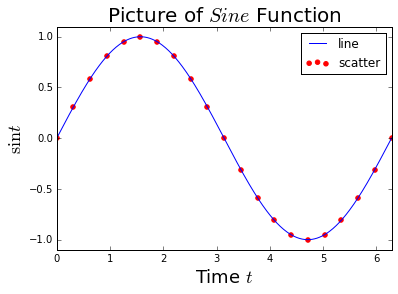

In [6]:
plt.plot(array1,SinData,label='line')
plt.scatter(array1[::20],SinData[::20],color='red',label='scatter')

plt.title(r'Picture of $Sine$ Function',size=20)
plt.xlabel(r'Time $t$',size=18)
plt.ylabel(r'$\sin t$',size=18)
plt.xlim(0,2*pi)
plt.ylim(-1.1,1.1)

plt.legend()

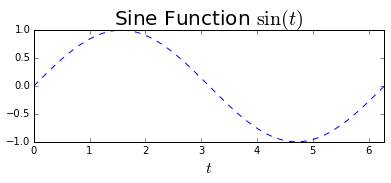

In [7]:
## Exact Scale

plt.figure(figsize=[2*pi,2])
plt.title("Sine Function $\sin(t)$",size=20)
plt.plot(array1,SinData,"--")
plt.axis([0,2*pi,-1,1])
plt.xlabel("$t$",size=16)

## Exercise
Observe the picture of $\sin(x+3/x)$.

In [ ]:
x=np.linspace(-2*pi,2*pi,400)
np.plot(x,sin(x+3/x))

<h2 id="Mathematical Basics">Mathematical Basics</h2>

<h2>Fourier Expansion</h2>

An intergrable periodic function, $f(x)$, on $[a.b]$ can be expanded as following convergent Fouries series:
$$f(x)=\sum\limits_{n=0}^\infty(a_n \cos(2n\pi x )+b_n \sin(2n\pi x)), n=0,1,2,\cdots$$

In brief, such kind functions can be assembled by infnity sine and cosine functions. 
The intensity of $a_n,b_n$ ca be calculated by:

$$a_n=\frac{1}{\pi}\int_{-\pi}^\pi f(x) \cos(2n\pi x)d x\\
  b_n=\frac{1}{\pi}\int_{-\pi}^\pi f(x) \sin(2n\pi x)d x$$


The square wave would be generated as follows:
$$\sum\limits_{n=0}^\infty\frac{\sin((2n+1)\pi)}{2n+1}$$

Basics of Fourier Series and Fourier Transform
---
<img src="data/images/fft.gif">

<h3 id="Outline">Outline</h3>
* [Square Wave by Fouries Series](#Fourier Series)
* [Codes behind Picture](#Flag of France)
* [Example of Fouries Series](#Square Wave)

* Spectrums of Sound

<h2 id="Square Wave">Square Wave</h2>

$$f(t)=\sin(t)+\frac{\sin(3t)}{3}+\frac{\sin(5t)}{5}+\frac{\sin(7t)}{7}+\frac{\sin(9t)}{9}$$

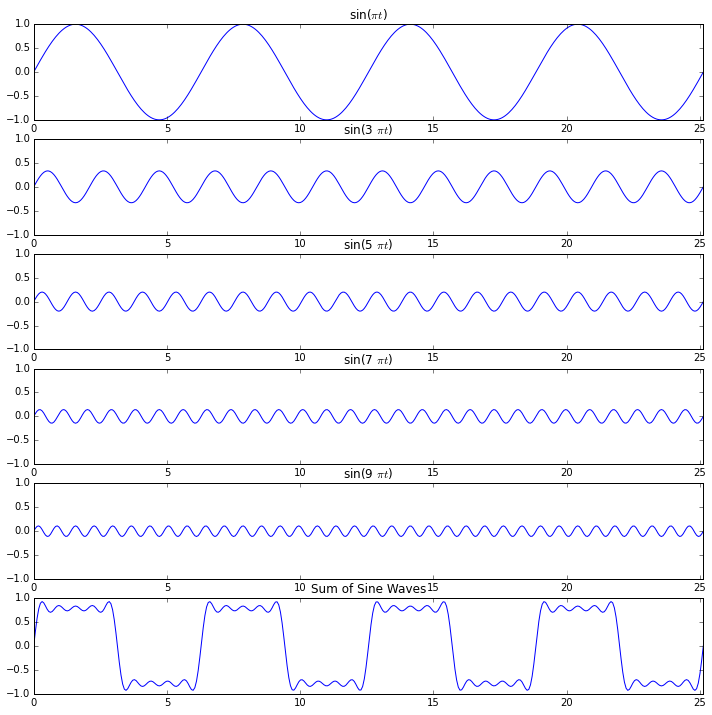

In [9]:
t=np.linspace(0,8*np.pi,400)
f=sin(1*t)/1.+sin(3*t)/3.+sin(5*t)/5.+sin(7*t)/7.+sin(9*t)/9.
plt.figure(figsize=(12,12))

for i in np.arange(5):
    plt.subplot(6, 1, i+1)
    plt.xlim([0,8*np.pi])
    plt.ylim([-1,1]) 
    n=2*i+1
    if (i==0):
       plt.title(r'sin($\pi t$)')
    else:
       plt.title(r'sin(%d $\pi t$)' %n)
    plt.plot(t,sin((2*i+1)*t)/(2*i+1.))

plt.subplot(6, 1, 6)
plt.title('Sum of Sine Waves')
plt.xlim([0,8*np.pi])
plt.plot(t,f)

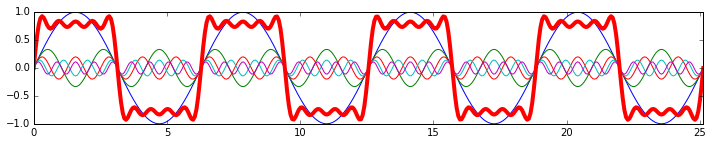

In [8]:
t=np.linspace(0,8*np.pi,400)
plt.figure(figsize=(12,2))
plt.xlim([0,8*np.pi])
plt.ylim([-1,1])
f=0
for i in np.arange(5): 
    f+=sin((2*i+1)*t)/(2*i+1.)
    plt.plot(t,sin((2*i+1)*t)/(2*i+1.))
plt.plot(t,f,'r',lw=4)

Note
---
- From above pictures, the amptitude of $\sin\frac{(2n+1)\pi}{2n+1}$ decreases rapidly such that the higher term can be omitted in applications.
- The noises occurs because of the omitted terms

<h3>Question</h3>
What is the picture about the following function:
$$f(t)=\sin(t)-\frac{\sin(2t)}{2}+\frac{\sin(3t)}{3}-\frac{\sin(4t)}{4}+\frac{\sin(5t)}{5}-\frac{\sin(6t)}{6}+\cdots$$


In [ ]:
t=np.linspace(0,8*np.pi,400)
plt.figure(figsize=(12,2))
plt.xlim([0,8*np.pi])
plt.ylim([-2,2])
f=0
for i in np.arange(6): 
    f+=(-1)**(i+1)*sin((i+1)*t)/(i+1.)
    plt.plot(t,(-1)**(i+1)*sin((i+1)*t)/(i+1.))
plt.plot(t,f,'r',lw=4)

## Note
Suppose that 
$$f(x)=\sum_n a_n \sin nt +b_n \cos nt$$

- How to specify the terms suche that $a_n$ or $b_n$ is not zero? 

  - $\int_0^{2\pi} \sin nt \sin mt dt \neq 0 \text{ if } m= n$;
  - $\int_0^{2\pi} \cos nt \cos mt dt \neq 0 \text{ if } m= n$.
- Conclusion:
  - $\int_0^{2\pi} f(t) \sin nt dt \neq0 \to a_n\neq0$;
  - $\int_0^{2\pi} f(t) \cos nt dt \neq0 \to b_n\neq0$
  - $n$ is called the spectrum if $a_n (b_n)\neq0$.

<h2 id="Flog of France">Flag of France</h2>

**What the codes hided in the Flag of France**

- make the flag
- Find out the spectrum for each segment.

In [12]:
rate=20000
t = np.linspace(0.0, 12.0, 12.*rate)
s1 = sin(2*pi*400*t)
s2 = 2*sin(2*pi*200*t)
s3 = 3*sin(2*pi*800*t)

mask1 = np.where(np.logical_and(t>0, t<4), 1.0, 0.0)
mask2 = np.where(np.logical_and(t>4, t<8), 1.0, 0.0)
mask3 = np.where(np.logical_and(t>8, t<12), 1.0, 0.0)
s1=s1*mask1
s2=s2*mask2
s3=s3*mask3

(0, 1)

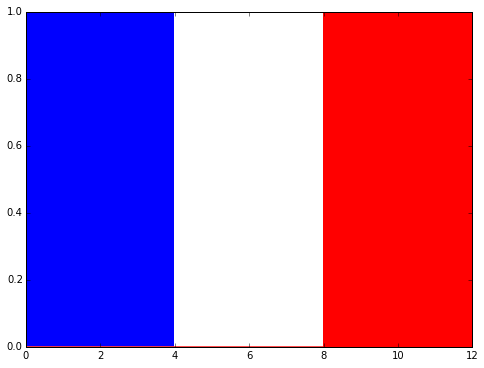

In [13]:
plt.figure(figsize=(8,6))
plt.plot(t,s1,'b',t,s2,'w',t,s3,'r')
plt.ylim(0,1)

(0, 1000)

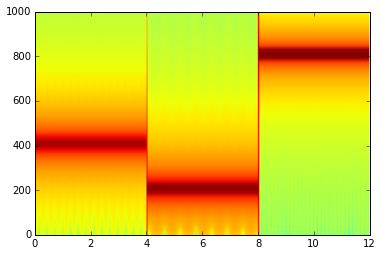

In [14]:
Pxx, freqs, bins, im=specgram(s1+s2+s3,Fs=rate,NFFT=1024)
plt.ylim(0,1000)

### Watch Sound Wave

In [15]:
A_SampleRate, A= read("data/audio/sine/sine_a.wav")
B_SampleRate, B= read("data/audio/sine/sine_b.wav")
M_SampleRate, M= read("data/audio/sine/sine_mix.wav")

/Users/cch/anaconda3/anaconda/lib/python3.4/site-packages/scipy/io/wavfile.py:42: WavFileWarning: Unknown wave file format
  warnings.warn("Unknown wave file format", WavFileWarning)


(0, 4000)

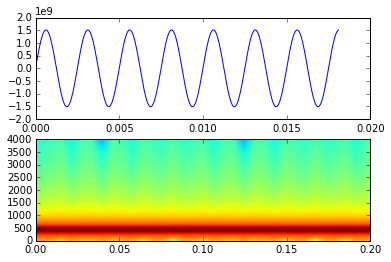

In [16]:
t0=0.2

TimeA=np.linspace(0, t0, num=len(A))
plt.title('400 Hz')
plt.subplot(211)
plt.plot(TimeA[0:400],A[0:400])
plt.subplot(212)
PxxA, freqsA, binsA, imA=specgram(A,Fs=A_SampleRate,xextent=(0,t0))
plt.ylim([0,4000])

(0, 4000)

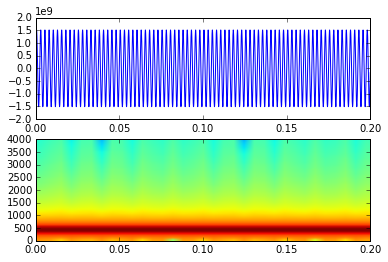

In [17]:
t0=0.2
TimeA=np.linspace(0, t0, num=len(A))
plt.subplot(211)
plt.plot(TimeA,A)
plt.subplot(212)
PxxA, freqsA, binsA, imA=specgram(A,Fs=A_SampleRate,xextent=(0,t0))
plt.ylim([0,4000])

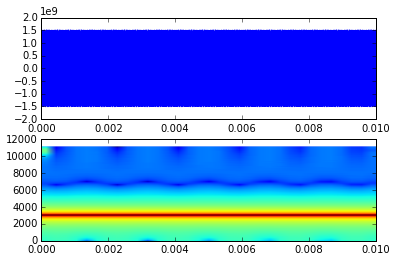

In [18]:
t0=0.01
TimeB=np.linspace(0, t0, num=len(B))
plt.subplot(211)
plt.plot(TimeB,B)
plt.subplot(212)
PxxB, freqsB, binsB, imA=specgram(B,Fs=B_SampleRate,xextent=(0,t0))

(0, 6000)

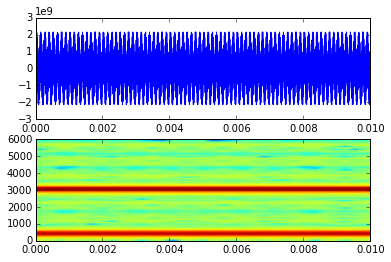

In [19]:
t0=0.01
TimeM=np.linspace(0, t0, num=len(M))
plt.subplot(211)
plt.plot(TimeM,M)
plt.subplot(212)
PxxM, freqsM, binsM, imA=specgram(M,Fs=M_SampleRate,xextent=(0,t0))
plt.ylim([0,6000])

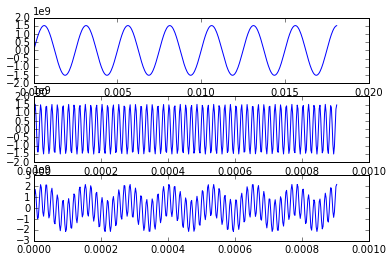

In [20]:
plt.subplot(311)
plt.plot(TimeA[0:400],A[0:400])
plt.subplot(312)
plt.plot(TimeB[0:400],B[0:400])
plt.subplot(313)
plt.plot(TimeM[0:400],M[0:400])

<h2 id="Denoizing processing">Denoizing processing</h2>

Here we will illustrate how to denoize the white noise for two-dimensional picture via FFT.

In [31]:
import matplotlib.pylab as plt

In [21]:
fname = 'data/images/moonlanding.png'
im = plt.imread(fname).astype(float) 
print("Image shape: %s" % str(im.shape))

Image shape: (474, 630)


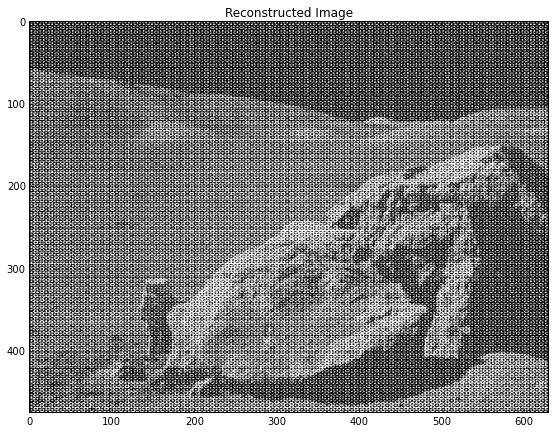

In [22]:
fig, ax = plt.subplots(figsize=(10,7))

ax.set_title('Reconstructed Image')
ax.imshow(im, plt.cm.gray);

In [23]:
def plot_spectrum(F, amplify=1000, ax=None):
    """Normalise, amplify and plot an amplitude spectrum."""

    # Note: the problem here is that we have a spectrum whose histogram is
    # *very* sharply peaked at small values.  To get a meaningful display, a
    # simple strategy to improve the display quality consists of simply
    # amplifying the values in the array and then clipping.

    # Compute the magnitude of the input F (call it mag).  Then, rescale mag by
    # amplify/maximum_of_mag.
    mag = abs(F) 
    mag *= amplify/mag.max() 
    
    # Next, clip all values larger than one to one.
    mag[mag > 1] = 1 

    if ax is None: ax = plt.gca()
    ax.imshow(mag, plt.cm.Blues)

## White Noise

White Noise is the high peak frequency generally appeared in signals, as the white lines in the above picture. 

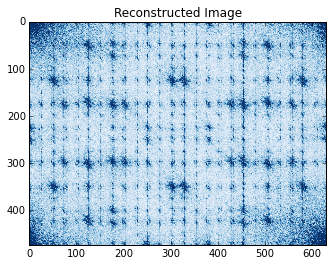

In [24]:
F = np.fft.fft2(im)  


fig, ax = plt.subplots()

ax.set_title('Reconstructed Image')
plot_spectrum(F);

In [25]:
F = np.fft.fft2(im)  

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform.  Numpy arrays have a copy
# method for this purpose.
ff = F.copy() 

# Set r and c to be the number of rows and columns of the array.
r,c= ff.shape 

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
ff[r*keep_fraction:r*(1-keep_fraction)] = 0  

# Similarly with the columns:
ff[:, c*keep_fraction:c*(1-keep_fraction)] = 0 

/Users/cch/anaconda3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/cch/anaconda3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


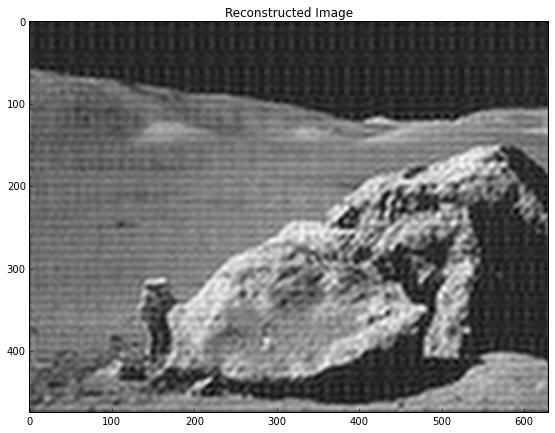

In [26]:
im_new = np.fft.ifft2(ff).real  

fig, ax = plt.subplots(figsize=(10,7))

ax.set_title('Reconstructed Image')
ax.imshow(im_new, plt.cm.gray);

In [66]:
%%bash
ipython nbconvert --to slides 2015-3-18-Fourier.ipynb


[NbConvertApp] Using existing profile dir: u'/Users/cchcch/.ipython/profile_default'
[NbConvertApp] Converting notebook 2014-1-3.ipynb to slides
[NbConvertApp] Support files will be in 2014-1-3_files/
[NbConvertApp] Loaded template slides_reveal.tpl
/Users/cchcch/anaconda/lib/python2.7/site-packages/IPython/nbconvert/filters/markdown.py:78: UserWarning: Node.js 0.9.12 or later wasn't found.
Nbconvert will try to use Pandoc instead.
  "Nbconvert will try to use Pandoc instead.")
[NbConvertApp] Writing 4128716 bytes to 2014-1-3.slides.html


## Refinement the converted HTML codes

- <b>IPython convert</b> uses Javascript libraries, <i>require.min.js, jquery.min.js</i>, and <font color="brown">reveal.js</font> (directory) and CSS style, <i>font-awesome.css</i> and the math rendering library, <font color="brown">MathJax</font> to make fancy effects; the HTML would work normally via internet by linke to their official sites defaultly. However, the following procedures makes the codes also work normally as well as on local machine:
- create sub-directory, <font color="brown">js</font>, and put <i> require.min.js, jquery.min.js</i>,  and <i>font-awesome.css </i> inside it.
- copy both  whole the <font color="brown">reveal.js</font> and <font color="brown">MathJax</font> under the main directory;
    - change the setting in converted HTML codes by link to local directory;
    - the theme background can be changes in the line, for example from "simple.css" to "sky.css" :
        
        &lt;link rel="stylesheet" href="reveal.js/css/theme/simple.css" id="theme">

In [9]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())